# <center> Lending Club Case Study </center>
    

<h4> Steps: 
<br/>
1. Load csv file and check the column level descriptions</br>
2. Filter dataset with required columns for analysis </br>
3. Fix the data issues for the required columns </br>

Rules:
1. If loan applicant has past history of charge off, mark him/her as Risky
2. If loan applicant has any deliquent accounts in the last 24 months, mark him/her as Risky
3. If loan applicant has any public derogatory records in last 7 years, mark him/her as Risky
4. If loan applicant has any recoveries/collection records in the past, mark him/her as Risky

</h4>

#### 1. Load loan.csv 

In [117]:
import pandas as pd
#import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("loan.csv",low_memory=False )

df.columns
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [28]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [29]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

#### 2. Creating new dataset with required columns for analysis

id </br>
member_id </br>
loan_amnt </br>
funded_amnt </br>
term </br>
int_rate </br>
installment </br>
emp_title </br>
emp_length </br>
home_ownership </br>
annual_inc </br>
issue_d </br>
loan_status </br>
title </br>
addr_state </br>
delinq_2yrs </br>
mths_since_last_delinq </br>
pub_rec </br>
revol_util </br>
total_rec_prncp </br>
total_rec_late_fee </br>
recoveries </br>
collection_recovery_fee </br>
collections_12_mths_ex_med </br>
mths_since_last_major_derog </br>
application_type </br>
annual_inc_joint </br>
acc_now_delinq </br>
tot_coll_amt </br>
chargeoff_within_12_mths </br>
delinq_amnt </br>
mths_since_recent_bc_dlq </br>
mths_since_last_record </br>


In [118]:
loan_df = df[['id',
'member_id',
'loan_amnt',
'funded_amnt',
'term',
'int_rate',
'installment',
'emp_title',
'emp_length',
'home_ownership',
'annual_inc',
'issue_d',
'loan_status',
'title',
'addr_state',
'delinq_2yrs',
'mths_since_last_delinq',
'pub_rec',
'revol_util',
'total_rec_prncp',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'collections_12_mths_ex_med',
'mths_since_last_major_derog',
'application_type',
'annual_inc_joint',
'acc_now_delinq',
'tot_coll_amt',
'chargeoff_within_12_mths',
'delinq_amnt',
'mths_since_recent_bc_dlq',
'mths_since_last_record',
'purpose',
'verification_status',
'funded_amnt_inv',
'total_pymnt_inv',
'total_pymnt',
'revol_bal',
'grade']]

In [31]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,installment,annual_inc,delinq_2yrs,mths_since_last_delinq,pub_rec,total_rec_prncp,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,acc_now_delinq,tot_coll_amt,chargeoff_within_12_mths,delinq_amnt,mths_since_recent_bc_dlq,mths_since_last_record
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,14035.000000,39717.000000,39717.000000,...,39717.000000,39661.0,0.0,0.0,39717.0,0.0,39661.0,39717.0,0.0,2786.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,324.561922,6.896893e+04,0.146512,35.900962,0.055065,9793.348813,...,12.406112,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,69.698134
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,208.874874,6.379377e+04,0.491812,22.020060,0.237200,7065.522127,...,148.671593,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,43.822529
min,5.473400e+04,7.069900e+04,500.000000,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,167.020000,4.040400e+04,0.000000,18.000000,0.000000,4600.000000,...,0.000000,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,22.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,280.220000,5.900000e+04,0.000000,34.000000,0.000000,8000.000000,...,0.000000,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,90.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,430.780000,8.230000e+04,0.000000,52.000000,0.000000,13653.260000,...,0.000000,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,104.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,1305.190000,6.000000e+06,11.000000,120.000000,4.000000,35000.020000,...,7002.190000,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,129.000000


In [32]:
loan_df['id'].unique 

<bound method Series.unique of 0        1077501
1        1077430
2        1077175
3        1076863
4        1075358
          ...   
39712      92187
39713      90665
39714      90395
39715      90376
39716      87023
Name: id, Length: 39717, dtype: int64>

#### 3. Fix the data issues for the required columns

In [119]:
#Fixing NA Values for month since last public record to identify customers with public records for the last 7 years
loan_df['mths_since_last_record'] = loan_df['mths_since_last_record'].fillna(0.0)

In [120]:
loan_df.groupby(['mths_since_last_record']).size()

mths_since_last_record
0.0      37601
5.0          1
6.0          1
7.0          1
11.0         2
         ...  
117.0       47
118.0       36
119.0       10
120.0        1
129.0        1
Length: 111, dtype: int64

In [11]:
loan_df['member_id'].unique 

<bound method Series.unique of 0        1296599
1        1314167
2        1313524
3        1277178
4        1311748
          ...   
39712      92174
39713      90607
39714      90390
39715      89243
39716      86999
Name: member_id, Length: 39717, dtype: int64>

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Checking the counts by State

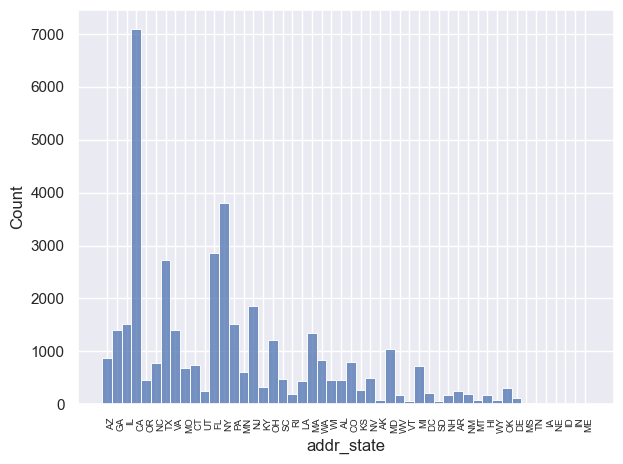

In [122]:
ax= sns.histplot(x=loan_df["addr_state"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left", fontsize=7)
plt.tight_layout()
plt.show()

#### Checking the distribution by loan status

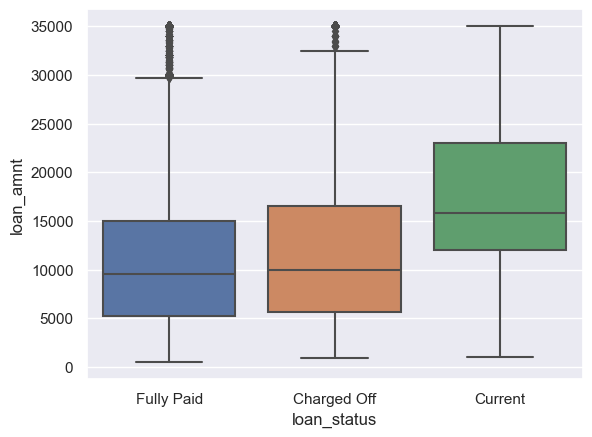

In [123]:
#plt.boxplot(data=loan_df, x="loan_amnt" )
sns.boxplot(x=loan_df["loan_status"], y=loan_df["loan_amnt"])
plt.show()

#### Checking the distribution by employee tenure

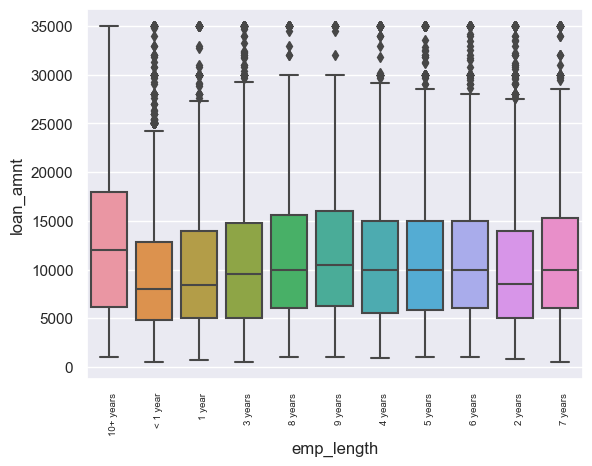

In [124]:
#Employees with higher tenure got higher loan amounts
#Employees with more than 5 years experience 
ax=sns.boxplot(x=loan_df["emp_length"], y=loan_df["loan_amnt"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left", fontsize=7)
plt.show()



#### Adding new column "Loan application status" to the dataset to update with Risky flag

In [125]:
loan_df["loan_applicant_status"]=""

#### Rules: 1. Identifying risky customers based on loan status. Charged off customers are treated as Risky

In [126]:
for index, row in loan_df.iterrows():
    if row['loan_status'] == "Charged Off":
        loan_df.at[index, 'loan_applicant_status'] = "Risky"
    else:
         loan_df.at[index, 'loan_applicant_status'] = "Not Risky"

#### Record count, group by loan application status

In [127]:
loan_df.groupby(['loan_applicant_status']).size()

loan_applicant_status
Not Risky    34090
Risky         5627
dtype: int64

#### Rules: 2. If loan applicant has any deliquent accounts in the last 24 months, mark him/her as Risky

In [128]:
#. If loan applicant has any deliquent accounts in the last 24 months, mark hikm as Risky

for index, row in loan_df.iterrows():
    if row['delinq_2yrs'] >0 and row['loan_applicant_status'] == "Not Risky" :
        loan_df.at[index, 'loan_applicant_status'] = "Risky"

In [129]:
loan_df.groupby(['loan_applicant_status']).size()

loan_applicant_status
Not Risky    30469
Risky         9248
dtype: int64

#### Rules: 3. If loan applicant has any public derogatory records in last 7 years, mark him/her as Risky

In [130]:
#. If loan applicant has any public derogatory records in last 7 years, mark him/her as Risky

for index, row in loan_df.iterrows():
    if row['pub_rec'] >0 and row['mths_since_last_record'] <= 84.0  and row['loan_applicant_status'] == "Not Risky" :
        loan_df.at[index, 'loan_applicant_status'] = "Risky"

In [45]:
loan_df.groupby(['loan_applicant_status']).size()

loan_applicant_status
Not Risky    30181
Risky         9536
dtype: int64

#### Rules: 4. If loan applicant has any recoveries/collection records in the past, mark him/her as Risky

In [131]:
#4. If loan applicant has any recoveries/collection records in the past, mark him/her as Risky

for index, row in loan_df.iterrows():
    if row['recoveries'] >0 and row['loan_applicant_status'] == "Not Risky" :
        loan_df.at[index, 'loan_applicant_status'] = "Risky"

        
loan_df.groupby(['loan_applicant_status']).size()

loan_applicant_status
Not Risky    30181
Risky         9536
dtype: int64

In [132]:
loan_df.groupby(['loan_applicant_status']).size()

loan_applicant_status
Not Risky    30181
Risky         9536
dtype: int64

#### Plotting results

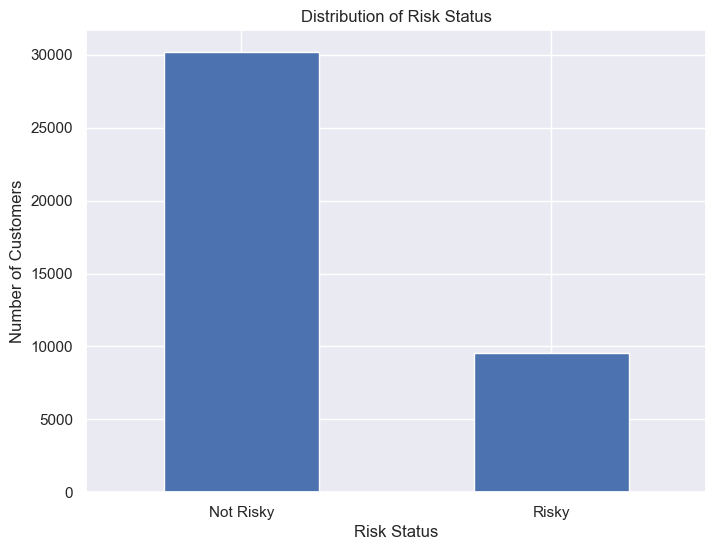

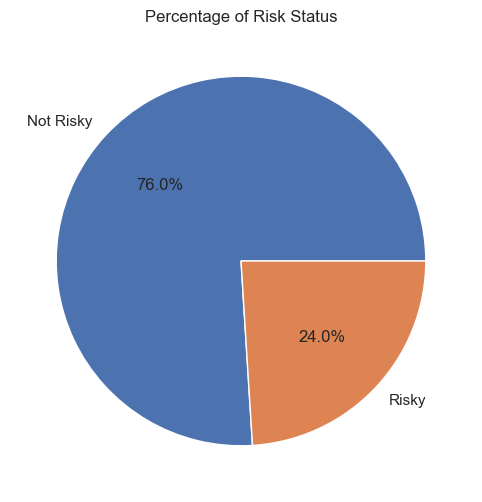

In [133]:
risk_counts = loan_df['loan_applicant_status'].value_counts()

plt.figure(figsize=(8, 6))
risk_counts.plot(kind='bar')
plt.title('Distribution of Risk Status')
plt.xlabel('Risk Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
risk_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Risk Status')
plt.ylabel('')
plt.show()

#### Annual Income distribution

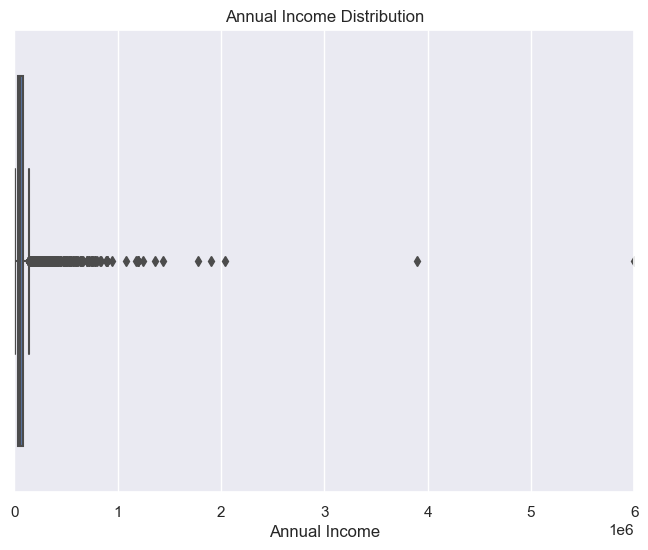

In [134]:
#Annual Income distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df['annual_inc'])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.xlim(0, loan_df['annual_inc'].quantile(1))
plt.show()

#### Annual income distribution till 99 percentile

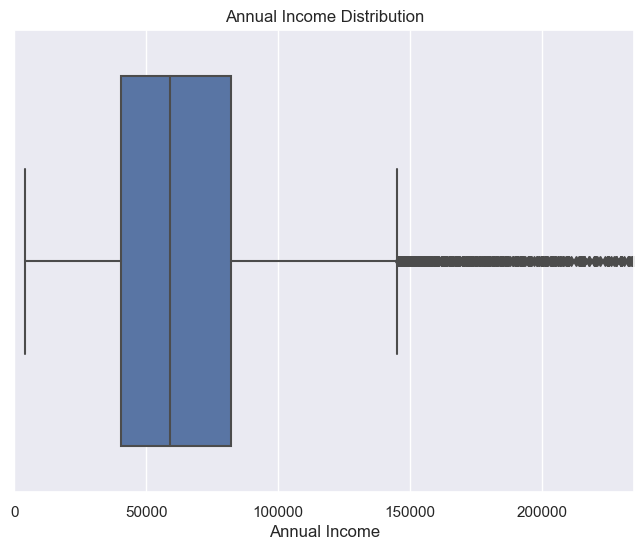

In [135]:
#Annual Income distribution till 99 percentile
plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df['annual_inc'])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.xlim(0, loan_df['annual_inc'].quantile(0.99))
plt.show()

#### Pivot on loan amount, purpose and loan status

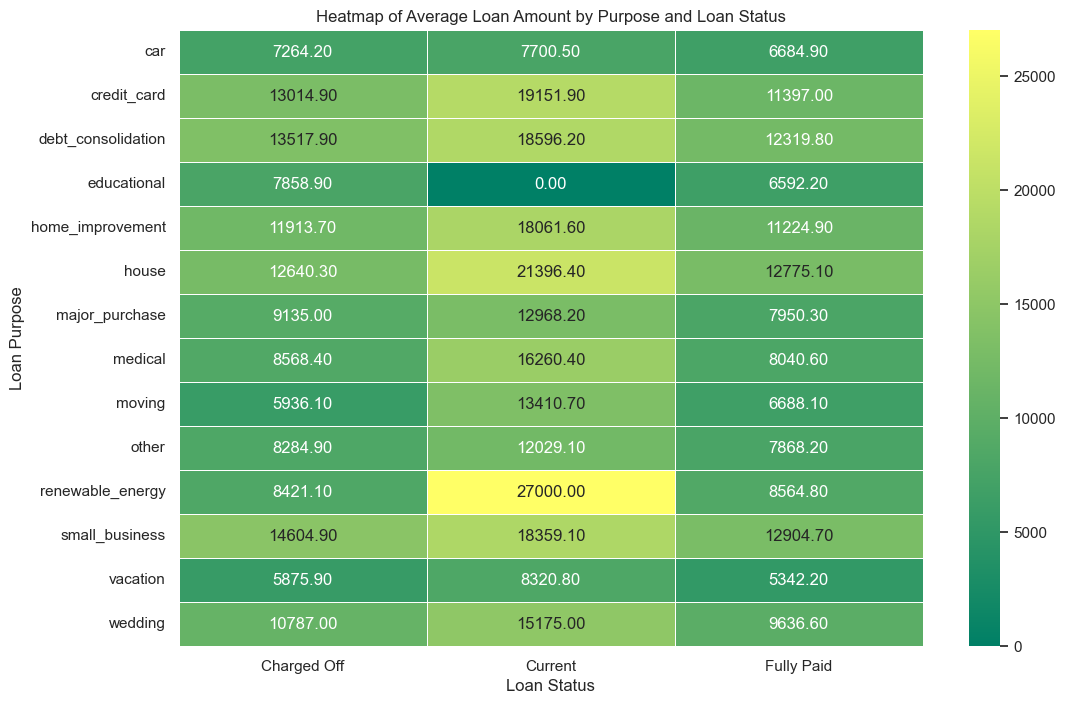

In [92]:
# Create a pivot table to calculate the average loan amount by purpose and loan status
pivot_table = round(loan_df.pivot_table( values='loan_amnt', index='purpose', columns='loan_status', aggfunc='mean',
    fill_value=0  # Replace NaN with 0 for missing values
    ),1)

plt.figure(figsize=(12, 8))  # Adjust size as needed
#sns.heatmap(pivot_table, annot=pivot_table.rank(axis="columns"), cmap='crest', fmt='.2f', linewidths=0.5)
sns.heatmap(pivot_table, annot=True, cmap='summer', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Average Loan Amount by Purpose and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Purpose')
plt.show()

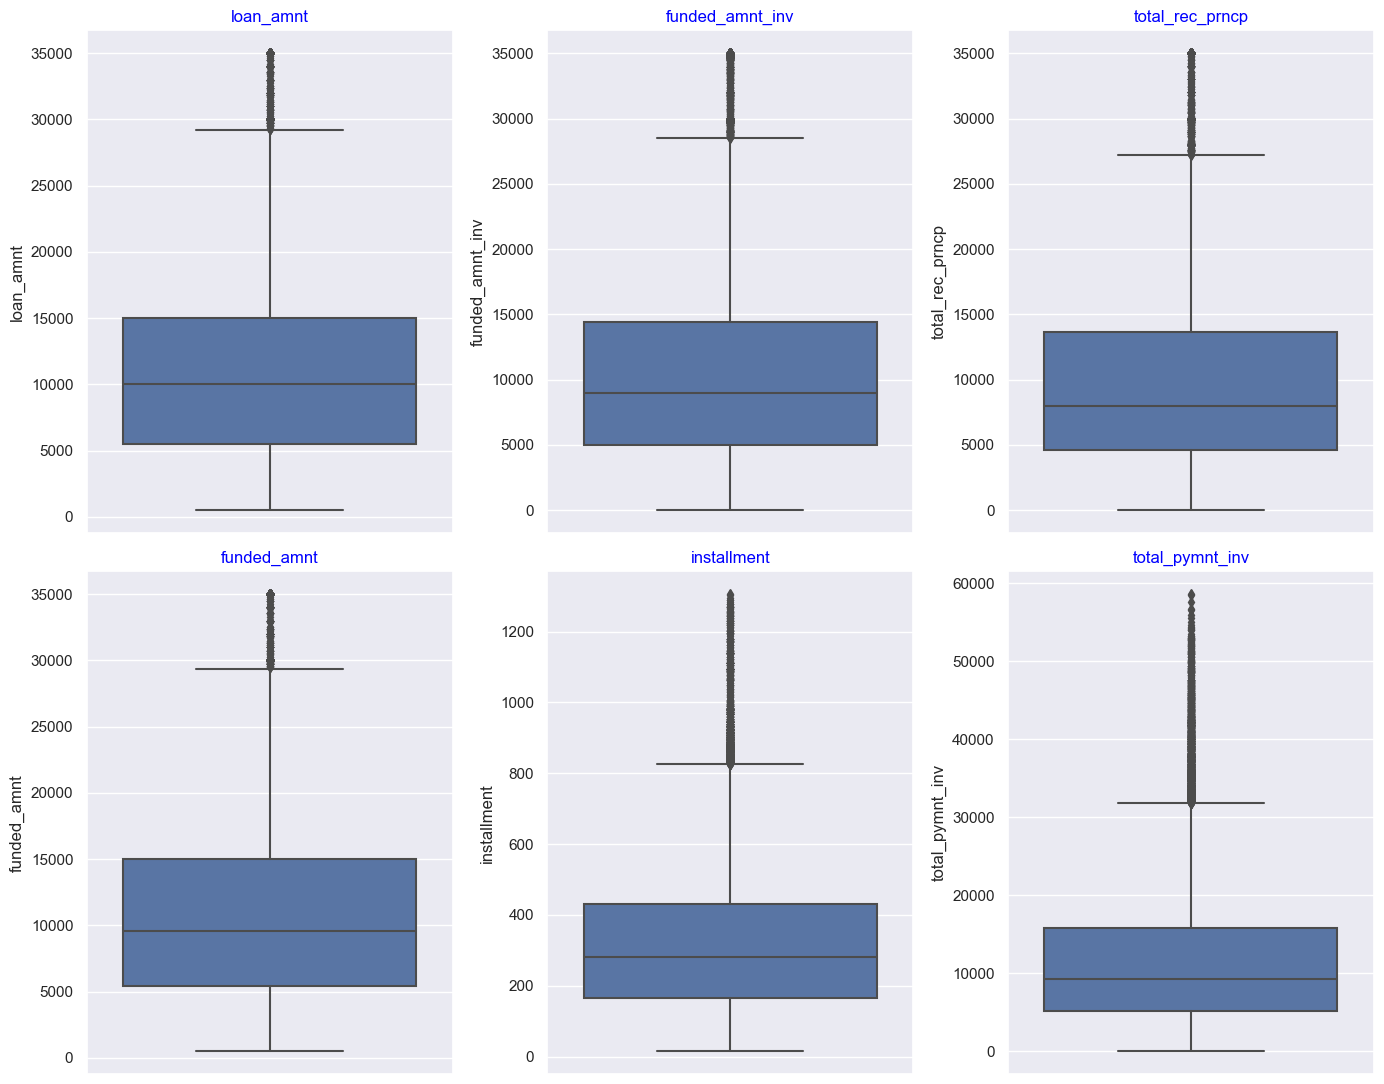

In [101]:
# List of columns to plot
columns_to_plot = ['loan_amnt', 'funded_amnt_inv', 'total_rec_prncp','funded_amnt', 'installment', 'total_pymnt_inv']

# Setting the aesthetic style of the plots
sns.set_style("darkgrid")
#palette_colors = ['green', 'orange', 'adobe', 'green', 'orange', 'green']

# Initialize the matplotlib figure
plt.figure(figsize=(14, 11))  # Adjust the size as necessary

# Create a boxplot for each specified column
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as necessary
    sns.boxplot(y=loan_df[column]) #, palette=[palette_colors[i]])
    plt.title(column, fontsize=12, color='blue')
    plt.tight_layout()   # Adjust layout to prevent overlap

plt.show()

#### Loan amount vs Total payment for the annual income ranges (ranges are custom defined)

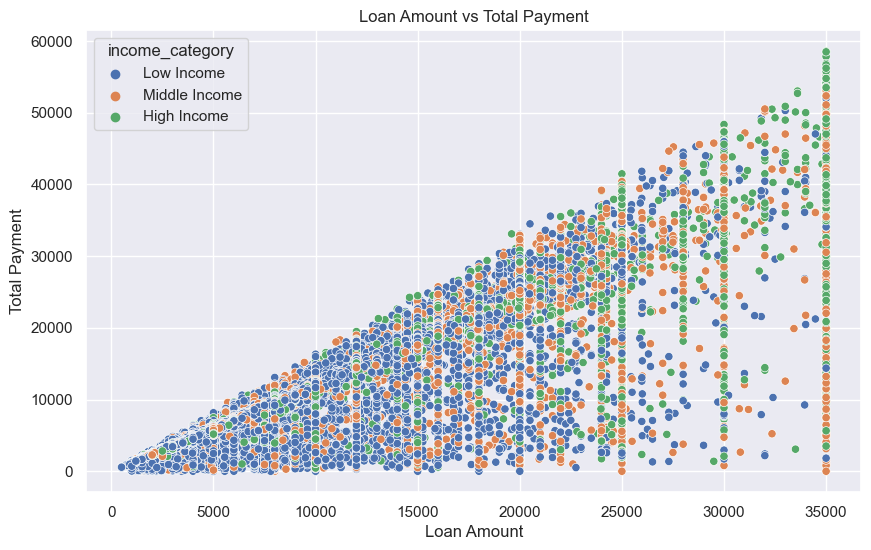

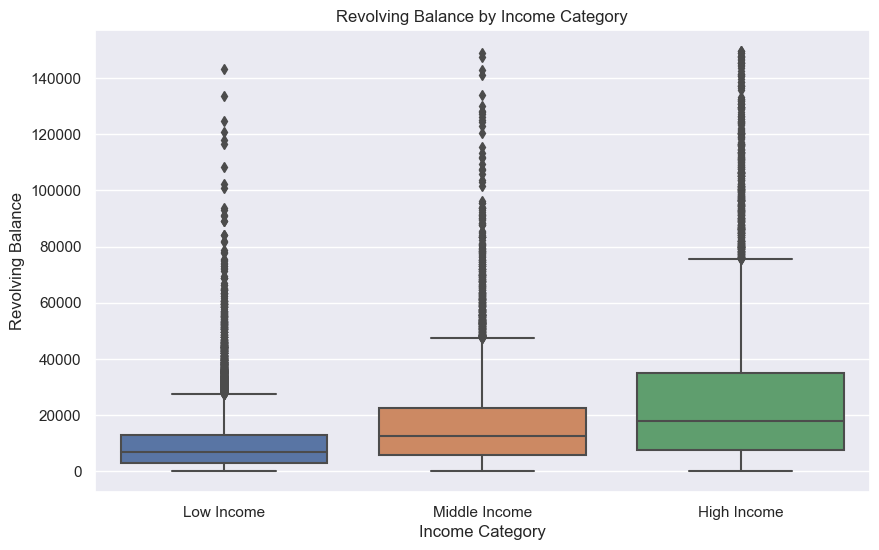

In [114]:
def categorize_income(income):
    if income < 70000:
        return 'Low Income'
    elif 70000 <= income < 100000:
        return 'Middle Income'
    else:
        return 'High Income'

loan_df['income_category'] = loan_df['annual_inc'].apply(categorize_income)
#revol_bal_range = pd.cut(df['revol_bal'], bins=range(0, int(df['revol_bal'].max()) + 5000, 20000))

# Bivariate Analysis using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='total_pymnt', hue='income_category', data=loan_df)
plt.title('Loan Amount vs Total Payment')
plt.xlabel('Loan Amount')
plt.ylabel('Total Payment')
plt.show()

# Bivariate Analysis using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='income_category', y='revol_bal', data=loan_df)
plt.title('Revolving Balance by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Revolving Balance')
plt.show()


#### Heatmap to showcase average loan amounts by grade and loan status

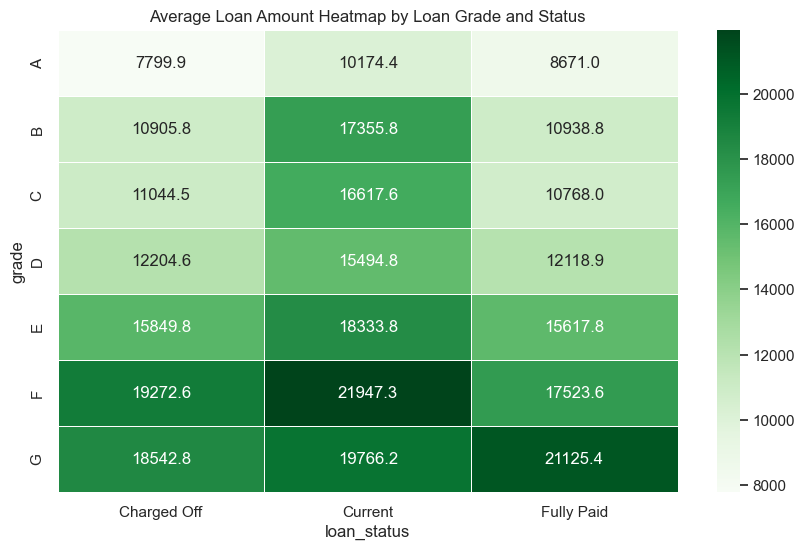

In [116]:
# Create a pivot table to calculate the average loan amount by loan grade and loan status
pivot_table = round(df.pivot_table(
    values='loan_amnt',
    index='grade',
    columns='loan_status',
    aggfunc='mean',
    fill_value=0  # Replace NaN with 0 for missing values
), 2)


# Create a heatmap to visualize the pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="Greens", fmt='.1f', linewidths=0.5)
plt.title('Average Loan Amount Heatmap by Loan Grade and Status')
plt.show()

#### Purpose of the loans taken vs number of loans

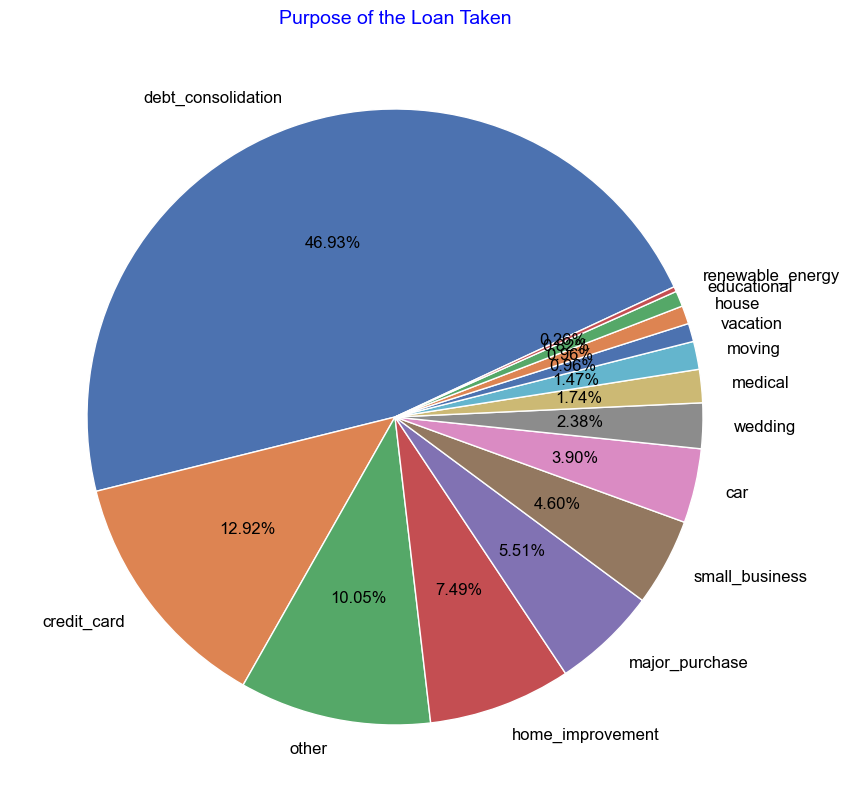

In [137]:
plt.figure(figsize=[13,10])
loan_df['purpose'].value_counts().plot.pie(autopct='%2.2f%%',  fontsize=12,  startangle=25, textprops={'color':'Black'}  )
plt.ylabel('')  # Hide the y-label
plt.title('Purpose of the Loan Taken', fontsize=14, color='Blue')
plt.show()